# Fourier Series Introduction
The Fourier Transform is arguably the most important algorithm in modern society. We can break apart the different tones and frequencies in a clip of sound by using a Fourier series to split the audio into a series of sines and cosines, which is how sound is transmitted over the phone and how we can play music from our phones.

_wave_params(nchannels=1, sampwidth=1, framerate=8363, nframes=13412, comptype='NONE', compname='not compressed') 
Bits per sample = 8


C:\Users\irbdr\AppData\Local\Temp/ipykernel_19376/2551429200.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.plot(log10(abs(c)))


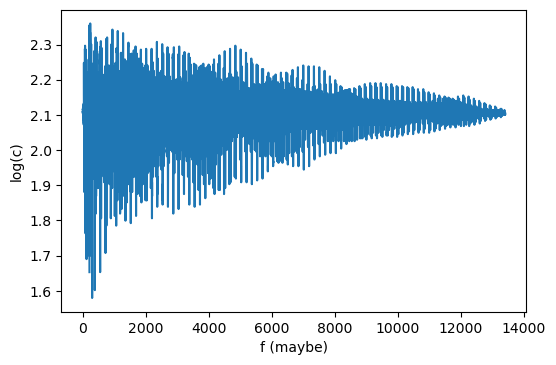

In [5]:
from numpy.fft import rfft
from numpy import array, log10, sin, pi
from cmath import exp, pi
from matplotlib import pyplot as plt
import wave
import sys

def read_wav(path):
    with wave.open(path, "rb") as wav:
        nchannels, sampwidth, framerate, nframes, _, _ = wav.getparams()
        print(wav.getparams(), "\nBits per sample =", sampwidth * 8)

        signed = sampwidth > 1  # 8 bit wavs are unsigned
        byteorder = sys.byteorder  # wave module uses sys.byteorder for bytes

        values = []  # e.g. for stereo, values[i] = [left_val, right_val]
        for _ in range(nframes):
            frame = wav.readframes(1)  # read next frame
            channel_vals = []  # mono has 1 channel, stereo 2, etc.
            for channel in range(nchannels):
                as_bytes = frame[channel * sampwidth: (channel + 1) * sampwidth]
                as_int = int.from_bytes(as_bytes, byteorder, signed=signed)
                channel_vals.append(as_int)
            values.append(channel_vals)

    return values, framerate

data, fs = read_wav("C:\\Users\\irbdr\\Downloads\\g-piano4.wav")

audio = array(data)

c = rfft(audio)

plt.figure(dpi=100)
plt.plot(log10(abs(c)))
plt.xlabel("f (maybe)")
plt.ylabel("log(c)")
plt.show()

## Using the Fourier Transform to detect the pitch of a sound

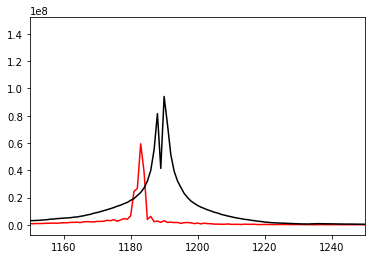

In [26]:
from numpy.fft import rfft
from numpy import loadtxt
from pylab import plot,xlim,show
from math import log2, pow

name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
A4 = 440
C0 = A4*pow(2, -4.75)

def pitch(freq):
    h = round(12*log2(freq/C0))
    octave = h // 12
    n = h % 12
    return name[n] + str(octave)

y = loadtxt("C:\\Users\\irbdr\\OneDrive\\Desktop\\piano.txt",float)
c = rfft(y)

y1 = loadtxt("C:\\Users\\irbdr\\OneDrive\\Desktop\\trumpet.txt",float)
c1 = rfft(y1)

plot(abs(c1), 'r')
plot(abs(c), 'k')
xlim(1150, 1250)
show()

The note being played is $D_{6}$, or $D$, 2 octaves above middle $C$.

## Using a data file that tracks the closing values of the Dow Jones index, we can use the Fourier Transforms to compress the data. Here we plot the data on top of each other to track how the compression changes the graph. This technique can even be used to create future predictions on how the stock market will change. (However, the farther out we try to predict, the less accurate our guess will be.)

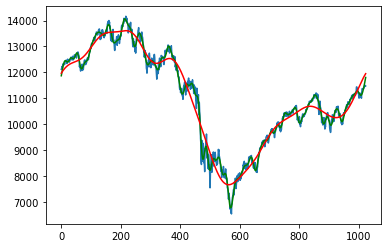

In [33]:
# Exercise 7.4
from numpy.fft import rfft, irfft
from numpy import loadtxt
from pylab import plot,xlim,show


y = loadtxt("C:\\Users\\irbdr\\OneDrive\\Desktop\\dow.txt", float)

plot(y)


c = rfft(y) #len(c) = 513

for i in range(51, 513):
    c[i] = 0

z = irfft(c)

plot(z, 'g')

for i in range(10, 51):
    c[i] = 0

w = irfft(c)

plot(w, 'r')
show()

# Conclusion
By using Fast Fourier Transforms we can compress the data, which saves space and computational time, which allows for many of the technological wonders of our day. It maintains the integrity of the data to a significant degree by selecting the most important parts of the data..